<r>11.12.2022 r.<r>
<h1><center>What is the Terra NFTs cryptocurrency?</center></h1>

<h3><center>Karol Bieńkowski, Jakub Łuczka, Kacper Paluch</center></h3>

<h3>What is the Terra NFTs?</h3>

Everybody knows or at least heard about Bitcoin and cryptocurrencies.

Usually, Bitcoin (as a “king of them all”) gets all the headlines when people talk about cryptocurrencies, but there are thousands of other options when it comes to these digital currencies. In this project, we dive into the crypto world and are going to focus on NFTs created on the Terra ecosystem (www.terra.money). To be more precise – we are going to analyse a new trend - “colored coin” – NFT (Non-Fungible Tokens). NFT is unique and can represent any digital asset on the blockchain eg. Pictures. Just for simplification and going into the key point of this list – each asset which you analyse has assigned a specific, unique token_id - which helps us to track all events related to that nft. Moreover, each picture is also unique as it is randomly generated and there are no same pictures.

When we thought about this project we found out, there is a new trend in Terra Network – NFTs – which are quite new in that ecosystem. There aren’t so many analyses about these collections so we are one of the first who analyses these data.

In [1]:
# Importing necessery modules

# Sending HTTP requests
import requests

# Data cleaning and struckered data managment
import numpy as np
import pandas as pd
from pandas import json_normalize

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Controlling the loops
from tqdm import tqdm

# Time sleeping
import time

<b>Terrapins on Terra</b>

To downloading, manipulating and analyzing the data we choose from NFT collection called '<b>Terrapins on Terra</b>', which catched our attention. In the description of our choice we can read that: 

<i>"Terrapins on Terra are 10,000 unique, randomly generated NFTs, each adorned with detailed hand drawn attributes. Also, they are turtelly awesome"</i>.

<center><img src = "turtle.jpg"></center>

Terrapins on Terra has also their own dedicated <a href="https://www.terrapinsonterra.com/">website</a> where we can find the information about uniqueness and hand-drawing style:

<i>Each Terrapin is completely unique as each one was generated algorithmically using over 100 different backgrounds, bases and attributes. We call this (de)generative art. Each of our Terrapins and their attributes are painstakingly hand-drawn for your viewing pleasure.</i>

In this collection are <b>10k items</b>, <b>3k owners</b>, <b>145k LUNA floor</b> and <b>72,5k LUNA daily avg</b>. Every offer has its own drawed, beatuful terrapin turtle, which can be perfectly seen on the screenshot below.

<center><img src = "terra_story.jpg"></center>

<h3>Handling with semi-structured data</h3>

Firstly we chose our nft on: randomearth.io and find out the contract address (“id” which represents collection)
Eg. Click “Explore Collection” and take the contract address from address bar

Then we requested data from website: https://fcd.terra.dev/v1/txs?offset={offset}&limit=100&account={contract} where <i>{offset}</i> initially should be set on 0 and <i>{contract}</i> should be the contract address from the previous point. Data contains all events related to that contract eg., Transactions, minting (creating) of NFT, giving/posting sell/buy offer.

* offset allows us to iterate over each historical event till no offset (no next key),
* In the Firefox browser we could easily check/look at the structure of the JSON,
* During looping over each offset we can set sleep time (to avoid errors) or made sleep time only if there is an error (try except formula),
* We discovered th rule that faster we start this task (at least retrieving these data), fewer loops we made.

Finally, we got data from json and store it into data object (eg. list)
- a) For each record in txs (let's call it tx_i) take all messages:
    * messages = tx_i['tx']['value']['msg'],
- b) iterate (for m in messages) over messages and take only these which have ‘execute_msg’ in m['value'].keys(),
- c) create message dictionary (or other structure) eg.: 
    * msgs = {
            'type':m['type'],
            'hash_id':tx_i['txhash'], <- event id
            'exe_msg':m['value']['execute_msg'] <-event details
            },
- d) create list of dictionaries (or other structure),
- e) we also saved timestamps.

To save our time in further analysis upload these data into a file.

In [420]:
def nft_data_downloader(number_of_contracts, link):
    '''Using requests package downloading all data
    related to the contract from NFT Terra ecosystem
    
    :param counter: number of different contracts
    :type counter: int
    
    :param link: adreess of the contracts in NFT Terra based on 
    id in the link
    :type link: string
    
    :returns: dictionary with contracts as keys and their 
    descriptions'''
    # Setting initial offset to 0 and creating a dict for results
    i = 0
    nft_data_dict = {}
    contract_adreess = link 
    
    for j in tqdm(range(number_of_contracts), desc = 'Progress'):
        # Construct the link with offset set to 0 and contract to our NFT
        nft_link = 'https://fcd.terra.dev/v1/txs?offset='+str(i)+contract_adreess
        # Send a request to the server
        data_i = requests.get(nft_link)
        # Get response in JSON format
        data_i = data_i.json()
        
        # Save these information to dictonary
        nft_data_dict.update({i : data_i})
        # Chceking for no offset
        try:
            i = int(data_i['next'])
            time.sleep(1)
        except:
            break
        
    return nft_data_dict


In [421]:
terrapins_data = nft_data_downloader(1000, '&limit=100&account=terra1f89xq3qhu98v4jch4y5xcrkhl9gytrne99x74t')

Progress:  91%|█████████▏| 914/1000 [28:04<02:38,  1.84s/it]


We had to set number of contracts in above function to high value equal to 1000, because when we were working with smaller values for example 150, 200 or 250 we did not get contracts with execute message <i>'mint_nft'</i> which was required to get some information about transactions and attrbiutes of each Terrapin.

In [422]:
# Checking ones more length of iterations
len(terrapins_data.values())

915

In [423]:
# Printing all of the keys in dictionary
terrapins_data.keys()

dict_keys([0, 341281144, 326010784, 319124174, 315429015, 314584113, 311386286, 310076936, 309202889, 308807612, 308168142, 307400701, 306326033, 305634578, 305465930, 304906778, 304564120, 304309608, 303415062, 303141150, 303134002, 302992635, 302908735, 302809400, 302541584, 302179809, 302057088, 301979812, 301905233, 295591153, 294724047, 292786793, 290699491, 288749702, 287655612, 286688669, 286064593, 285495637, 283403852, 281239965, 276885692, 270858084, 268394420, 266801633, 265099548, 263450430, 259884851, 256264753, 252589592, 247944108, 243802356, 239157320, 235819147, 233803885, 231015683, 229524732, 227822522, 227166471, 225634247, 223322631, 221581341, 220120588, 218246188, 216204824, 214822161, 213643058, 212847884, 212407600, 211767574, 211221852, 210746859, 210318717, 209777027, 208089696, 205889507, 203033472, 200390688, 197795297, 196151957, 193595732, 191877469, 190005953, 188611981, 187030178, 185275711, 183640151, 182390441, 181401967, 181177550, 180938471, 1806379

In [425]:
# Showing example of a record with all messages
record_example = terrapins_data[159406152]
messages_example = record_example['txs']

messages_example[0]['tx']['value']['msg']

[{'type': 'wasm/MsgExecuteContract',
  'value': {'coins': [],
   'sender': 'terra136k9susej3tpt6jlf5vm8ke2wc2n0u7yu2zcp3',
   'contract': 'terra1f89xq3qhu98v4jch4y5xcrkhl9gytrne99x74t',
   'execute_msg': {'approve': {'spender': 'terra1eek0ymmhyzja60830xhzm7k7jkrk99a60q2z2t',
     'token_id': '213889634973143281754255844884444287495'}}}},
 {'type': 'wasm/MsgExecuteContract',
  'value': {'coins': [],
   'sender': 'terra136k9susej3tpt6jlf5vm8ke2wc2n0u7yu2zcp3',
   'contract': 'terra1eek0ymmhyzja60830xhzm7k7jkrk99a60q2z2t',
   'execute_msg': {'deposit': {'asset': {'info': {'nft': {'token_id': '213889634973143281754255844884444287495',
        'contract_addr': 'terra1f89xq3qhu98v4jch4y5xcrkhl9gytrne99x74t'}},
      'amount': '1'}}}}},
 {'type': 'wasm/MsgExecuteContract',
  'value': {'coins': [],
   'sender': 'terra136k9susej3tpt6jlf5vm8ke2wc2n0u7yu2zcp3',
   'contract': 'terra1eek0ymmhyzja60830xhzm7k7jkrk99a60q2z2t',
   'execute_msg': {'post_order': {'order': {'sig': [],
      'order': {'ma

In [426]:
# Cheking what information about event id looks like
messages_example[0]['txhash']

'70CC02C76DC3BB768AF1745CC5A4CFB4FCF15337671B4F467F651554D14F6340'

In [767]:
# Cheking what information about timestamp looks like
messages_example[0]['timestamp']

'2021-10-06T21:27:54Z'

In [768]:
def messages_exatrcting(nft_dict):
    '''Iterating over all messages for all keys in the
    dictionary and save information about event id and
    event details
    
    :param nft_dict: list with all messages for every key
    :type nft_dict: dictionary
    
    :returns: three lists with event id, event details and a timestamp
    (of a transaction)'''
    
    # Three lists for three types of information
    messages_list = []
    txhash_list = []
    timestamp_list = []
    
    # Loop over all keys in dictionary (like above)
    for key in nft_dict.keys():
        nft_id = nft_dict[key]['txs']
        
        for i in range(0, len(nft_id)):
            # Extrating right type of information 
            single_message = nft_id[i]['tx']['value']['msg']
            single_txhash = nft_id[i]['txhash']
            single_timestamp = nft_id[i]['timestamp']
            
            # Saving to the list
            messages_list.append(single_message)
            txhash_list.append(single_txhash)
            timestamp_list.append(single_timestamp)
        
        #if messages_list[i][0]['value']['execute_msg'] == None:
        #    messages_list.remove(messages_list[i])
            
    return messages_list, txhash_list, timestamp_list


In [769]:
messages, txhash, timestamp = messages_exatrcting(terrapins_data)

In [770]:
# Cheking the length of each list
print(len(messages), len(txhash), len(timestamp))

91482 91482 91482


In [771]:
# Looking at message
print(messages[0][0]['value']['execute_msg'].keys())
print(messages[0][0]['value']['execute_msg'].values())

dict_keys(['withdraw'])
dict_values([{'asset': {'info': {'nft': {'token_id': '139702327859193398288582154195786397475', 'contract_addr': 'terra1f89xq3qhu98v4jch4y5xcrkhl9gytrne99x74t'}}, 'amount': '1'}}])


In [772]:
timestamp

['2022-12-06T13:32:55Z',
 '2022-11-21T14:29:04Z',
 '2022-11-18T15:31:45Z',
 '2022-11-18T15:13:03Z',
 '2022-11-18T14:12:56Z',
 '2022-11-18T14:12:17Z',
 '2022-11-18T14:11:25Z',
 '2022-11-18T14:08:47Z',
 '2022-11-17T09:40:54Z',
 '2022-11-17T09:40:35Z',
 '2022-11-17T09:40:04Z',
 '2022-11-17T09:39:46Z',
 '2022-11-17T09:39:29Z',
 '2022-11-17T09:39:18Z',
 '2022-11-17T09:39:06Z',
 '2022-11-17T09:37:38Z',
 '2022-11-17T09:37:24Z',
 '2022-11-15T06:03:24Z',
 '2022-11-07T16:18:39Z',
 '2022-11-07T16:17:18Z',
 '2022-11-04T13:42:14Z',
 '2022-11-04T13:39:41Z',
 '2022-11-02T17:33:02Z',
 '2022-11-02T17:27:23Z',
 '2022-11-02T01:55:18Z',
 '2022-11-02T01:55:06Z',
 '2022-11-02T01:54:40Z',
 '2022-11-02T01:53:57Z',
 '2022-11-02T01:53:20Z',
 '2022-10-27T21:27:56Z',
 '2022-10-27T21:26:01Z',
 '2022-10-26T00:46:15Z',
 '2022-10-26T00:45:57Z',
 '2022-10-26T00:18:38Z',
 '2022-10-26T00:08:09Z',
 '2022-10-26T00:07:56Z',
 '2022-10-24T22:52:25Z',
 '2022-10-23T16:56:13Z',
 '2022-10-23T16:56:01Z',
 '2022-10-23T16:55:55Z',


<h3>Data cleaning and preparing</h3>

5. Details about each nft (about characteristics) can be found only if 'mint_nft' is in the msgs i.e 'mint_nft' in msgs[num][ 'exe_msg']
    * In that structure, you can find the following keys (depending on the collection which you analyse, it can have more or fewer keys) token_id, token_url, extension which contains more important keys , name (?), image (?), attributes, descriptions (?). Details about transactions should be found under the “execute_order” key where the maker gives nft and taker gives uluna (eg. 1000000 uluna = 1 luna) - luna is one of the main currencies of terra network.


6. Create a table where each row represent each nft and its characteristics + other useful information.

7. And table where each row represent transactions.

8. Clean your data if needed eg. “hair”: “blue hair” – remove “hair” from description to obtain “hair”:”blue”.

<b>Tokens, transactions and timestamps</b>

In [773]:
def list_of_dictionaries(mess_list, txhash_list, time_list):
    '''Creating a dictionary with the same three list
    as before, but with segregation of values and keys
    
    :param mess_list: list with event details
    :type mess_list: list
    
    :param txhash_list: list with event id
    :type txhash_list:
    
    :param time_list: list with event timestamp
    :type time_list: list
    
    :returns: a dictionary with four keys which can 
    help with tokenazation'''
    
    # Creating new dictionary with four keys
    new_nft_dict = {'type_msg' : [],
                    'tx_hash' : [],
                    'desc_msg' : [],
                    'timestamp' : []
                    }
    
    for i in range(len(mess_list)):
        try:
            # Extracting informaton (type, description, txhash and timestamp)
            type_of_mess = list(mess_list[i][0]['value']['execute_msg'].keys())
            #type_of_mess = type_of_mess[12:-3]
            desc_of_mess = list(mess_list[i][0]['value']['execute_msg'].values())
            txhash = txhash_list[j]
            timestamp = time_list[j]
            
            # Saving them to the right keys
            new_nft_dict['type_msg'].append(type_of_mess)
            new_nft_dict['desc_msg'].append(desc_of_mess)
            new_nft_dict['tx_hash'].append(txhash)
            new_nft_dict['timestamp'].append(timestamp)
        except:
            pass
    
    return new_nft_dict


In [774]:
nft_events_dict = list_of_dictionaries(messages, txhash, timestamp)

In [775]:
# Cheking if the fucntion acts correctly and what information we get in each category
nft_events_dict['type_msg'][0], nft_events_dict['desc_msg'][0]

(['withdraw'],
 [{'asset': {'info': {'nft': {'token_id': '139702327859193398288582154195786397475',
      'contract_addr': 'terra1f89xq3qhu98v4jch4y5xcrkhl9gytrne99x74t'}},
    'amount': '1'}}])

In [776]:
nft_events_dict['tx_hash'][0], nft_events_dict['timestamp'][0]

('714BB44D87C08B2535EAAD91B1C8F6A9EF7D02A87C46D676F8AB6FA876D9EC73',
 '2022-11-18T15:31:45Z')

In [777]:
def transaction_report(nft_events_dict):
    '''Function which creates three lists with information
    about token ids, transactions and timestamp
    
    :param nft_events_dict: dictionary with type of message,
    description, thhash and timestamp of the contract
    :type nft_events_dict: dict
    
    :returns: three lists with token ids, amount of 
    transactions and time of the transaction'''
    
    # Creating three empty lists for all parameters of transaction
    tokens = []
    transactions = []
    timestamps = []
    
    # Loop over description of the messages
    for i in range(len(nft_events_dict['desc_msg'])):
        # Checking the type of message
        msg_val = nft_events_dict['type_msg'][i]
        time_i = nft_events_dict['timestamp'][i]

        if msg_val == ['execute_order']:
            order_info = nft_events_dict['desc_msg'][i][0]['order']['order']
            
            # Two cases for 'maker' and 'taker' assets
            
            if 'nft' in order_info['maker_asset']['info']:
                token_i = list(order_info['maker_asset'].values())
                token_i = int(token_i[0]['nft']['token_id'])
                tokens.append(token_i)

                trans_i = list(order_info['taker_asset'].values())
                # Changing ulunas into lunas (1 000 000 uluna = 1 luna)
                trans_i = int(trans_i[1]) / 1000000
                transactions.append(trans_i)

                timestamps.append(time_i)

            if 'nft' in order_info['taker_asset']['info']:
                token_i = list(order_info['taker_asset'].values())
                token_i = int(token_i[0]['nft']['token_id'])
                tokens.append(token_i)

                trans_i = list(order_info['maker_asset'].values())
                # Changing ulunas into lunas (1 000 000 uluna = 1 luna)
                trans_i = int(trans_i[1]) / 1000000
                transactions.append(trans_i)

                timestamps.append(time_i)
                
    return tokens, transactions, timestamps


In [778]:
tokens, transactions, timestamps = transaction_report(nft_events_dict)

In [779]:
# Cheking if the length of each list is the same as others
len(tokens), len(transactions), len(timestamps)

(1771, 1771, 1771)

In [780]:
# Example of a transaction
tokens[0], transactions[0], timestamps[0]

(37652866804103441027315721591982379783, 3.0, '2022-11-18T15:31:45Z')

In [781]:
transaction_dict = {'token' : [],
                    'transaction' : [],
                    'timestamp' : []}

for i in range(0, len(token)):
    single_token = tokens[i] 
    transaction_dict['token'].append(single_token)
    
    single_transaction = transactions[i]
    transaction_dict['transaction'].append(single_transaction)
    
    single_timestamp = timestamps[i]
    transaction_dict['timestamp'].append(single_timestamp)
    

In [782]:
transaction_df = pd.DataFrame.from_dict(transaction_dict)
transaction_df['timestamp'].unique()

array(['2022-11-18T15:31:45Z'], dtype=object)

In [783]:
# Saving information about transaction to csv to not downloading all every time
transaction_df.to_csv('Terrapin_transactions.csv')

<b>Names and attributes</b>

As before we also exatrcting necessery information about Terrapins using the 'report' of the transactions which where were enclosed in execute messages on condition that it was equal to 'mint_nft'. To gain these knowledge, firstly we had to download nearly 1000 contracts. We segregated token ids, images and all attributes for each Terrapin. Then we checked how many features each turtle has and then saved these descriptions into .csv file to not to repeat whole process once more.

In [454]:
def messages_analysis(mess_list):
    '''Gain specific information from messages of the 
    events in NFT Terra transactions if the execute 
    message is euqal to state 'mint_nft'
    
    :param mess_list: list with event details
    :type mess_list: list
    
    :returns: four lists with specific information of 
    the event: name, image, atrributes and token id'''
    
    nft_name, nft_image = [], []
    nft_attributes, nft_token_id = [], []
    unique, count = [], 0
    
    # Loop over all messages for cheking if in 'execute_message'
    # is a phrase 'mint_nft' - Otherwise details cannot be found
    for i in range(0, len(messages)):
        for m in range(0, len(messages[i])):
            try:
                nft = str(messages[i][m]['value']['execute_msg'].keys())
                if nft in unique:
                    pass
                else:
                    unique.append(nft)
                nft = nft[12:-3]
                if nft == 'mint_nft':
                    #print(i)
                    count += 1
                    nft_val = messages[i][m]['value']['execute_msg'].values()
                    nft_val = list(nft_val)
                    nft_token_id_i = int(nft_val[0]['token_id'])
                    nft_token_id.append(nft_token_id_i)
                    
                    nft_name_i = nft_val[0]['extension']['name']
                    nft_name.append(nft_name_i)
                    
                    nft_image_i = nft_val[0]['extension']['image']
                    nft_image.append(nft_image_i)
                    
                    nft_attributes_i = nft_val[0]['extension']['attributes']
                    all_atrb = []
                    for j in range(0, len(nft_attributes_i)):
                        all_atrb_j = list(nft_attributes_i[j].values())
                        all_atrb.append(all_atrb_j)
                    nft_attributes.append(all_atrb)
            except:
                pass

    return nft_name, nft_image, nft_attributes, nft_token_id, unique


In [455]:
names, images, attributes, token_ids, unique = messages_analysis(messages)

In [456]:
# Looking for 'mint_nft' values
unique

["dict_keys(['withdraw'])",
 "dict_keys(['send_nft'])",
 "dict_keys(['transfer_nft'])",
 "dict_keys(['set_like'])",
 "dict_keys(['admin_cancel_auction'])",
 "dict_keys(['cancel_order'])",
 "dict_keys(['set_profile'])",
 "dict_keys(['create_comment'])",
 "dict_keys(['add_balance'])",
 "dict_keys(['execute_order'])",
 "dict_keys(['cancel_auction'])",
 "dict_keys(['settle'])",
 "dict_keys(['approve'])",
 "dict_keys(['post_sell_order'])",
 "dict_keys(['place_bid'])",
 "dict_keys(['post_buy_order'])",
 "dict_keys(['register_nft_collection'])",
 "dict_keys(['withdraw_nft'])",
 "dict_keys(['update_whitelist'])",
 "dict_keys(['post_order'])",
 "dict_keys(['deposit'])",
 "dict_keys(['buy'])",
 "dict_keys(['post_ad'])",
 "dict_keys(['cancel'])",
 "dict_keys(['revoke'])",
 "dict_keys(['set_royalty'])",
 "dict_keys(['set_royalty_fee'])",
 "dict_keys(['mint_nft'])",
 "dict_keys(['register_collection'])"]

In [465]:
# Checking for number of attributes for every turtle
attributes[0]

[['Mint', 'Background'],
 ['Geisha', 'Skin'],
 ['Knight Sword - Brown', 'Shell'],
 ['Naked', 'Body'],
 ['Snarl - Cigar', 'Mouth'],
 ['Cyborg - Closed Eye', 'Eyes'],
 ['Spiky Hair - Brown', 'Head']]

In [462]:
# Number of traits is equal to 7, so remove the ones with more traits
number_of_traits = []
traits_to_remove = []

for i in range(len(attributes)):
    actual_trait = len(attributes[i])
    number_of_traits.append(actual_trait)
    
    if actual_trait > 7:
        to_be_removed = i
        traits_to_remove.append(to_be_removed)

len(number_of_traits), len(traits_to_remove)

(10000, 0)

In [463]:
df = pd.DataFrame()

df['Number_of_traits'] = number_of_traits
traits_fractions = df['Number_of_traits'].value_counts(normalize = True)
traits_fractions

7    1.0
Name: Number_of_traits, dtype: float64

We made sure that all of our traits has <b>7</b> attributes. From the website randomearth.io we know that Terrapins on Terra features are: body, eyes, head, skin, mouth, shell and background, which made every terrapin unique appearance. So we save these informations to pandas.DataFrame.

In [468]:
def terrapins_to_dataframe(name_list, image_list, attributes_list, token_list):
    '''Saving all the informations about Terrapins to
    the pandas.DataFrame format
    
    :param name_list: list with names of Terrapins
    :type name_list: list
    
    :param iamge_list: list with images of Terrapins
    :type image_list: list
    
    :param attributes_list: nested lists with attributes 
    of Terrapins (body, eyes, head, skin, mouth, shell 
    and background)
    :type name_list: list
    
    :param token_list: list with token ids of Terrapins
    :type token_list: list
    
    :returns: DataFrame object which can be futher analyzed
    '''
    
    # Create a dictionary with charakterics of single Terrapin
    terrapin = {'token_id' : [],
                'name' : [],
                'image' : [],
                'attributes' : [],
                'body' : [],
                'head' : [],
                'eyes' : [],
                'mouth' : [],
                'skin' : [],
                'shell' : [],
                'background' : []}
    
    # Loop over all examples and saving right stats
    for i in range(len(name_list)):
        name = name_list[i]
        terrapin['name'].append(name)
        
        image = image_list[i]
        terrapin['image'].append(image)
        
        attributes = attributes_list[i]
        terrapin['attributes'].append(attributes)
        
        token_id = token_list[i] 
        terrapin['token_id'].append(token_id)
        
        # Loop for every attribute
        
        # 1. Body
        body = None
        for j in range(len(attributes)):
            if attributes[j][1] == 'Body':
                body = attributes[j][0] 
                terrapin['body'].append(body)
        
        if body == None:
            terrapin['body'].append('No_body')
            
        # 2. Eyes
        eyes = None
        for k in range(len(attributes)):
            if attributes[k][1] == 'Eyes':
                eyes = attributes[k][0] 
                terrapin['eyes'].append(eyes)
        
        if eyes == None:
            terrapin['eyes'].append('No_eyes')
            
        # 3. Head
        head = None
        for m in range(len(attributes)):
            if attributes[m][1] == 'Head':
                head = attributes[m][0] 
                terrapin['head'].append(head)
        
        if head == None:
            terrapin['head'].append('No_head')
            
        # 4. Mouth
        mouth = None
        for n in range(len(attributes)):
            if attributes[n][1] == 'Mouth':
                mouth = attributes[n][0] 
                terrapin['mouth'].append(mouth)
        
        if mouth == None:
            terrapin['mouth'].append('No_mouth')
            
        # 5. Shell
        shell = None
        for q in range(len(attributes)):
            if attributes[q][1] == 'Shell':
                shell = attributes[q][0] 
                terrapin['shell'].append(shell)
        
        if shell == None:
            terrapin['shell'].append('No_shell')
            
        # 6. Skin
        skin = None
        for p in range(len(attributes)):
            if attributes[p][1] == 'Skin':
                skin = attributes[p][0] 
                terrapin['skin'].append(skin)
        
        if skin == None:
            terrapin['skin'].append('No_skin')
            
        # 7. Background
        background = None
        for t in range(len(attributes)):
            if attributes[t][1] == 'Background':
                background = attributes[t][0] 
                terrapin['background'].append(background)
        
        if background == None:
            terrapin['background'].append('No_background')
            
    # Changing dict into DataFrame 
    terrapin_df = pd.DataFrame.from_dict(terrapin)
    terrapin_df.to_csv('Terrapin_NFT.csv')
    
    return terrapin_df
        

In [469]:
terra_df = terrapins_to_dataframe(names, images, attributes, token_ids)

<h3>Data analysis - 1st part</h3>

Now we can start our data analysis process, so we are going to explore simple features and check rarity of each of them. For example we want to answer of these types of questions:
<ul>
    <li>How many nfts have the specific trait eg. Blue hair?</li>
    <li>How many defined defined traits has each nft?</li>
    <li>Is there in the collection some nfts which do not have specific traits?</li>
    <li>Are there in data some collocations/permutations (n-gram analysis)?</li>
</ul>

So we check the unique values of each feauture, calculate their fraction in all and create graphs of frequency.

We created in previous part the .csv file. It contains all information we have gained about tokens, names and attributes, so every turtle has its own unique combination. We will use this descriptions to provide some data analysis about the features and their frequency. To do it we use a fet types of graphs for example bar plot or bubble plot.

In [98]:
terra_df = pd.read_csv('Terrapin_NFT.csv', index_col = 0)
terra_df.head()

,token_id,name,image,attributes,body,head,eyes,mouth,skin,shell,background
0,21115668659623778144848103954867683887,Terrapin #04880,ipfs://QmXarfYwaA3o83LTsXHJFKB5tyFJ8NRkfzsirMX...,"[['Mint', 'Background'], ['Geisha', 'Skin'], [...",Naked,Spiky Hair - Brown,Cyborg - Closed Eye,Snarl - Cigar,Geisha,Knight Sword - Brown,Mint
1,339686573371205809325137876315247034028,Terrapin #09271,ipfs://QmW8ACSfTzmMN69L4maLMiEQJAuXitziHc4senZ...,"[['Mint', 'Background'], ['Lion', 'Skin'], ['B...",Naked,Mohawk - Black,Tweeker Eyes,Snarl,Lion,Base Shell,Mint
2,26845686848091010612034591826243939022,Terrapin #00735,ipfs://QmeFmExzbbA58h3ZQdtcAZcncMggYuQXe9MbztM...,"[['Blue Grey', 'Background'], ['Geisha', 'Skin...",Steam Punk Shirt - Red,None,Monocle - Bored Eyes,Grin - 5pm Shadow,Geisha,Diamond Back,Blue Grey
3,29725014212231427076011833295205785773,Terrapin #08213,ipfs://QmbgsWj3ZWE57spQkCUTpbp7L6EzrNyQ8zHSM7z...,"[['Lilac', 'Background'], ['Common', 'Skin'], ...",Leather Jacket - Black and White,Girls Hair - Brown,Eyepatch - Bored,Dopey,Common,Base Shell,Lilac
4,208630217786676767860015082049195109707,Terrapin #03821,ipfs://QmZhQ1hcXWgoS7Gu3mDgdQhC5UNHnGnbBnCq5GT...,"[['Mint', 'Background'], ['Lion', 'Skin'], ['B...",Leather Jacket - Black and White,Pylon Helmet,Eyepatch - Angry,Grin - 5pm Shadow,Lion,Base Shell,Mint


In [99]:
terra_df.shape

(10000, 11)

<b>None types of attributes</b>

Earlier we checked the fact that every Terrapin has right number of attributes. Now we want to discover if some features have None values which means that Terrapin has not got this feature, even if it is not classified as NaN. So we print all unique values for each attribute and count their number among columns.

In [100]:
# Looking for every None or basic feature of the attributes
body_none = terra_df['body'].unique()
body_none
# Lack of wanted values

array(['Naked', 'Steam Punk Shirt - Red',
       'Leather Jacket - Black and White', 'Hawaiian Shirt - Watermelon',
       'Cloak - Black', 'Kings Robe', 'Leather Jacket - Black',
       'Cloak - Brown', 'Suit and Tie', 'Hawaiian Shirt - Pineapple',
       'Orange Shirt', 'Luna Jersey', 'Cloak - Blue', 'Tuxedo', 'Kimono',
       'Luna Shirt', 'Luna Jersey 30', 'Steam Punk Shirt - Blue',
       'Assassins Cloak - White', 'Assassins Cloak - Black',
       'Suit of Armour', 'Genesis', 'Space Suit - Red',
       'Space Suit - Blue'], dtype=object)

In [101]:
eyes_none = terra_df['eyes'].str.strip('Eyes').unique()
eyes_none
# Lack of wanted values

array(['Cyborg - Closed ', 'Tweeker ', 'Monocle - Bored ',
       'patch - Bored', 'patch - Angr', 'Sunnies - Gun Metal', 'Bored ',
       'Sunnies - Gold', 'Steam Punk - Tweeker', 'Cyborg - Angr',
       'Goggle Steam Punk - Black', 'Angry Tweeker ',
       'Monocle - Tweeker ', 'Steam Punk - Angr', 'Cyborg - Angry Clown',
       'Sunnies - Pink', 'Steam Punk - Bored', 'Anime Eyes - Blu',
       'Bored Eyes - Shaved Brow', 'Closed ', 'Cyborg - Bored',
       'Cyborg - Tweeker', 'Goggle Steam Punk', 'Laser ',
       'patch - Tweeker', 'Spectacles - Tortoise Shell',
       'Steam Punk - Tweeker - Purpl', 'Bandana - Blu', 'Terrorpin',
       'Cyborg - Laser', 'Steam Punk - Angry Clown',
       'Goggle Steam Punk - Laser', 'Genesi'], dtype=object)

In [102]:
head_none = terra_df['head'].unique()
head_none
# None

array(['Spiky Hair - Brown', 'Mohawk - Black', 'None',
       'Girls Hair - Brown', 'Pylon Helmet', 'Cheese Head', 'Angel Halo',
       'Afro', 'Mohawk - Green', 'Crown - Emerald', 'Cap - Luna',
       'Octopus', 'Fried Egg', 'Girls Hair - Pink', 'Mohawk - Silver',
       'Pirate Bandana', 'Cap - ANC', 'Terrorpin', 'Mohawk - Red',
       'Crown - Ruby', 'Devil Horns', 'Ape Hat', 'Spiky Hair - Blonde',
       'Bonnett', 'Assassins Cowl - White', 'Red Hair with Horns',
       'Unicorn', 'Mohawk - Blue', 'Wizard Hat - Blue', 'Ramen',
       'Lion Hat', 'Wizard Hat - Brown', 'Mop Hair Brown',
       'Crown - Sapphire', 'Dragon Hat - Purple', 'Rainbow Cap',
       'Top Hat - black', 'Mohawk - Purple', 'Knight Helmet - Red',
       'Cap - MIR', 'Dragon Hat - Green', 'Cap - Pylon', 'Basketball',
       'Spiky Hair - Black', 'Bull Hat', 'Bowler Hat',
       'Assassins Cowl - Black', 'Knight Helmet - Blue', 'Ice Cream',
       'Mop Hair Black', 'Penguin Hat', 'Top Hat - Steam Punk', 'Pizza',
  

In [103]:
mouth_none = terra_df['mouth'].unique()
mouth_none
# Lack of wanted values

array(['Snarl - Cigar', 'Snarl', 'Grin - 5pm Shadow', 'Dopey', 'Vampire',
       'Grin', 'Bubblegum', 'Subtle Smile', 'Licky Licky', 'Beard',
       'Scream', 'Terrorpin', 'Snarl - Nose Ring', 'Dopey - Vampire',
       'Scowl', 'Ehh', 'Moustache', 'Monster', 'Dopey - Drool',
       'Grin - Cigar', 'Sad', 'Genesis'], dtype=object)

In [104]:
skin_none = terra_df['skin'].unique()
skin_none
# Lack of wanted values

array(['Geisha', 'Lion', 'Common', 'Rainbow', 'Leopard Lion', 'Dalmation',
       'Tiger', 'Luna', 'Black and Yellow', 'Monochrome', 'Teddy',
       'Unicorn', 'Chocolate', 'Frog', 'Zebra', 'Hellfire',
       'Leopard Unicorn', 'Tiger Teddy', 'Zombie', 'Genesis'],
      dtype=object)

In [118]:
shell_none = terra_df['shell'].unique()
shell_none
# Cyt and pace are values that tells nothing (maybe some errors)

array(['Knight Sword - Brown', 'Base ', 'Knight Sword - Green',
       'Armoured ', 'Dragon Wings - Green', ' Spikes',
       'Knight Sword - Blu', ' Cannon', 'Diamond Back', 'team Punk ',
       'Dragon Scale - Green', 'Angel Wings', 'Turtle Katana',
       'Dragon Wings - Purp', 'Knight Sword - Red', 'Dragon Wings - Red',
       'Dragon Scale - Purp', 'Dragon Wings - Bones',
       'Dragon Wings - Black', 'cyt', 'Genesis', 'pace '], dtype=object)

In [106]:
background_none = terra_df['background'].unique()
background_none
# Lack of wanted values

array(['Mint', 'Blue Grey', 'Lilac', 'Steel Blue', 'Charcoal Full Moon',
       'Baby Blue', 'Burnt Orange', 'Baby Yellow', 'Neon Pink', 'Purple',
       'Early Light', 'Blood Red - Big Moon', 'Midnight Blue - Big Moon',
       'Clouds', 'Charcoal - Big Moon', 'Genesis'], dtype=object)

In [107]:
# Creating a dateframe to show how many missing values per attribute

labels = ['background', 'body', 'eyes', 'head', 'mouth', 'skin', 'shell']

# Counting missing values in three cases
back, bodies, eyes, mouth, skin = 0, 0, 0, 0, 0
heads = terra_df[(terra_df['head'] == 'None')].count().iloc[0]
shells = terra_df[(terra_df['shell'] == 'cyt') | (terra_df['shell'] == 'pace ')].count().iloc[0]

counts = [1 - back, 1 - round(bodies / 10000, 3), 1 - eyes, 1 - round(heads / 10000, 3), 
          1 - mouth, 1 - skin, 1 - round(shells / 10000, 3)]


In [108]:
miss_df = pd.DataFrame()

miss_df['Feature'] = labels
miss_df['Percentage'] = counts
miss_df

,Feature,Percentage
0,background,1.000
1,body,1.000
2,eyes,1.000
3,head,0.919
4,mouth,1.000
5,skin,1.000
6,shell,1.000


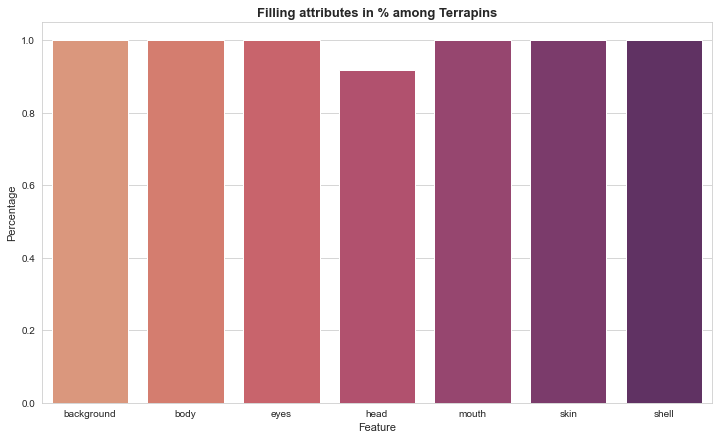

In [109]:
# Plot it on the bar plot
sns.set_style('whitegrid')
plt.figure(figsize = (12, 7))
sns.barplot(data = miss_df, x = 'Feature', y = 'Percentage', palette = 'flare')

plt.xlabel('Feature', fontsize = 11)
#plt.xticks(rotation = 90)
plt.ylabel('Percentage', fontsize = 11)
plt.title(r'Filling attributes in % among Terrapins', fontsize = 13, weight = 'bold')

plt.show()

So we can see that only in head and shell features we have somen None or error values. In the next steps we drop these ones to get better view and calculate more precise rarity rating.

In [112]:
# Dropping None values in head category
terra_df = terra_df[terra_df['head'] != 'None']
terra_df.shape

(9194, 11)

In [119]:
# Dropping 'cyt' and 'pace ' values in shell category
terra_df = terra_df[(terra_df['shell'] != 'cyt') & (terra_df['shell'] != 'pace ')]
terra_df.shape

(9086, 11)

<b>a) Body</b>

In [120]:
# Counting the most frequent hosts in the database
body_type = terra_df.groupby(by='body').count()

# Create new DataFrame with only the top 10 frequent hosts
top_body = pd.DataFrame(body_type.name)
top_body.reset_index(inplace = True)
top_body.rename(columns = {'name' : 'Number_of_bodies', 'body' : 'Body_type'}, inplace = True)

top_body.head()

,Body_type,Number_of_bodies
0,Assassins Cloak - Black,92
1,Assassins Cloak - White,39
2,Cloak - Black,591
3,Cloak - Blue,263
4,Cloak - Brown,521


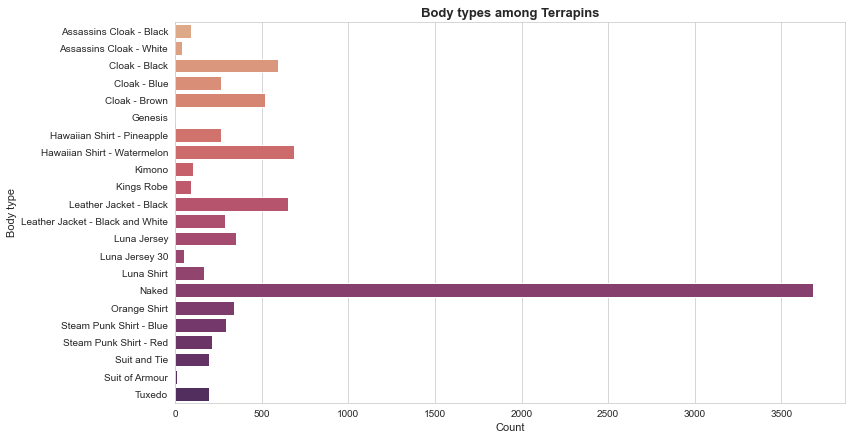

In [121]:
# Plot it on the bar plot
sns.set_style('whitegrid')
plt.figure(figsize = (12, 7))
sns.barplot(data = top_body, x = 'Number_of_bodies', y = 'Body_type', palette = 'flare')

plt.xlabel('Count', fontsize = 11)
plt.ylabel('Body type', fontsize = 11)
plt.title(r'Body types among Terrapins', fontsize = 13, weight = 'bold')

plt.show()

As we can see, naked body type is the most popular one with significantly advantage among others types. Some bodies are very rare and even do not reach the number of 250, some are cross the level of 500. But none of the them bring closer to Naked which has more than 3500 values.

<b>b) Head</b>

In [122]:
# Counting the most frequent hosts in the database
head_type = terra_df.groupby(by = 'head').count()

# Create new DataFrame with only the top 10 frequent hosts
top_head = pd.DataFrame(head_type.name)
top_head.reset_index(inplace = True)
top_head.rename(columns = {'name' : 'Number_of_heads', 'head' : 'Head_type'}, inplace = True)

top_head = top_head.sort_values(by = 'Number_of_heads', ascending = False).head(10)
top10_head = top_head[top_head['Head_type'] != 'None']
top10_head

,Head_type,Number_of_heads
35,Mohawk - Black,421
55,Spiky Hair - Brown,380
54,Spiky Hair - Blonde,317
53,Spiky Hair - Black,303
13,Cap - ANC,288
41,Mohawk - Silver,286
27,Fried Egg,270
36,Mohawk - Blue,267
15,Cap - MIR,251
46,Pirate Bandana,236


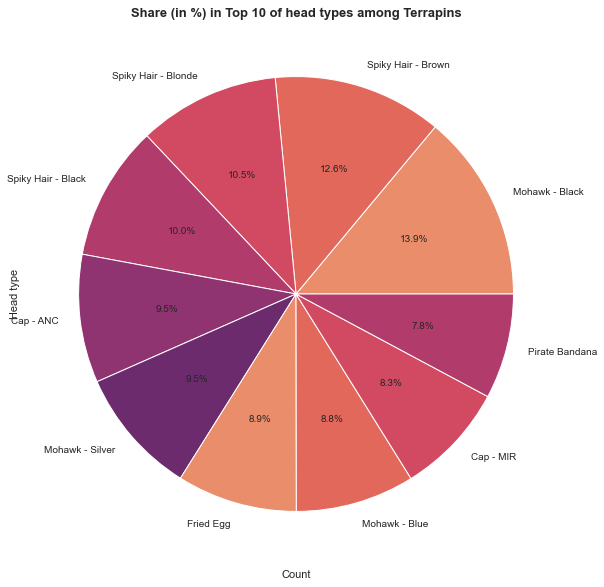

In [123]:
# Plot it on the pie plot
sns.set_style('whitegrid')
sns.set_palette('flare')
plt.figure(figsize = (10, 10))

plt.pie(top10_head['Number_of_heads'], labels = top10_head['Head_type'], autopct = '%1.1f%%')

plt.xlabel('Count', fontsize = 11)
plt.ylabel('Head type', fontsize = 11)
plt.title(r'Share (in %) in Top 10 of head types among Terrapins', fontsize = 13, weight = 'bold')

plt.show()

In the hair case we have different situation. There are less types of this feature (only 10) and the participation of each one is more equal and hesitates from 7.8\% to 14%. The leader in this category is Mohawk - Black.

<b>c) Eyes</b>

In [124]:
# Counting the most frequent hosts in the database
eyes_per = terra_df.eyes.value_counts(normalize = True)
eyes_per.head(4)

Tweeker Eyes           0.208232
Bored Eyes             0.162118
Steam Punk - Angry     0.041823
Sunnies - Gun Metal    0.038741
Name: eyes, dtype: float64

In [125]:
# Counting the most frequent hosts in the database
eyes_type = terra_df.eyes.value_counts()

# Create new DataFrame with only the top 10 frequent hosts
top_eyes = pd.DataFrame(eyes_type)
top_eyes.reset_index(inplace = True)
top_eyes.rename(columns = {'eyes' : 'Number_of_eyes', 'index' : 'Eyes_type'}, inplace = True)
top_eyes['Eyes_type'] = top_eyes['Eyes_type'].str.strip('Eyes')

top_eyes.head()

,Eyes_type,Number_of_eyes
0,Tweeker,1892
1,Bored,1473
2,Steam Punk - Angr,380
3,Sunnies - Gun Metal,352
4,Cyborg - Bored,340


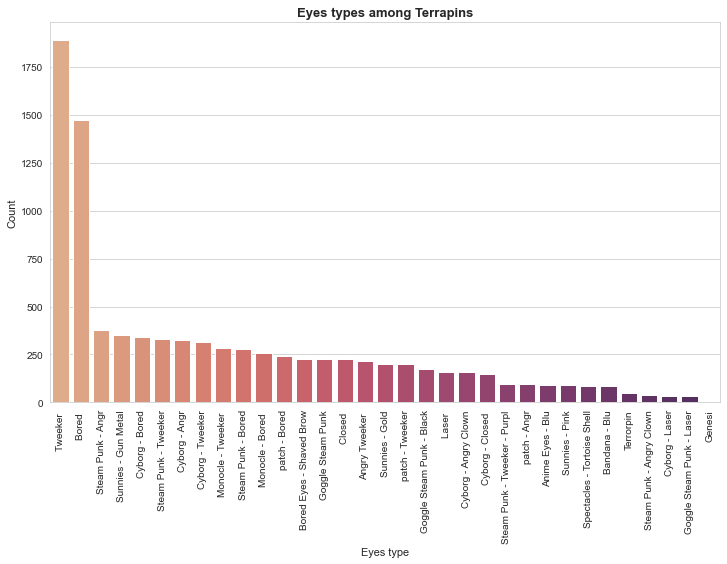

In [126]:
# Plot it on the bar plot
sns.set_style('whitegrid')
plt.figure(figsize = (12, 7))
sns.barplot(data = top_eyes, y = 'Number_of_eyes', x = 'Eyes_type', palette = 'flare')

plt.ylabel('Count', fontsize = 11)
plt.xlabel('Eyes type', fontsize = 11)
plt.xticks(rotation = 90)
plt.title(r'Eyes types among Terrapins', fontsize = 13, weight = 'bold')

plt.show()

When we consider eyes, the most frequent typoes are Tweeker and Bored eyes. They both reach the level of 1250 (Tweeker so much more) and they determine about 36\% of the eyes among all Terrapins. Then the values are much less than these two and decrese smoothly until the Genesis which is only one in whole dataset.

<b>d) Mouth</b>

In [127]:
# Counting the most frequent hosts in the database
mouth_type = terra_df.mouth.value_counts()

# Create new DataFrame with only the top 10 frequent hosts
top_mouth = pd.DataFrame(mouth_type)
top_mouth.reset_index(inplace = True)
top_mouth.rename(columns = {'mouth' : 'Count', 'index' : 'Mouth_type'}, inplace = True)
#top_mouth['Mouth_type'] = top_eyes['Mouth_type'].str.strip('Eyes')

top_mouth.head(5)

,Mouth_type,Count
0,Dopey,1484
1,Grin,1344
2,Ehh,784
3,Snarl,390
4,Monster,386


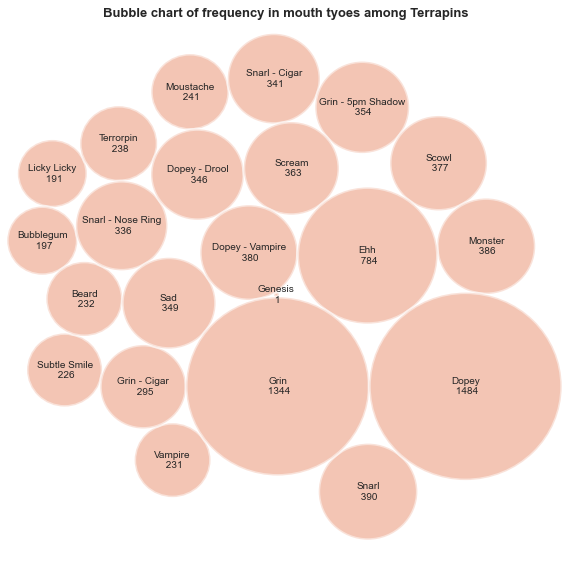

In [128]:
# To introduce bublle plot we must import new module
import circlify

fig, ax = plt.subplots(figsize=(10, 10))

# Adjusting the plot
ax.set_title('Bubble chart of frequency in mouth tyoes among Terrapins', fontsize = 13, weight = 'bold')
ax.axis('off')

top_mouth = top_mouth.sort_values(by = 'Count')

# Create bubbles size based on count of every mouth type
circles = circlify.circlify(top_mouth['Count'].tolist(),
                            show_enclosure = False,
                            target_enclosure=circlify.Circle(x = 0, y = 0, r = 1))
labels = top_mouth['Mouth_type']

# Find axis boundaries
lim = max(max(abs(circle.x) + circle.r, abs(circle.y) + circle.r,)
    for circle in circles)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

# Plotting the circles
for circle, label in zip(circles, labels): 
    x, y, r = circle
    counter = top_mouth[top_mouth['Mouth_type'] == label]
    label = label + '\n {0}'.format(counter.iloc[0, 1])
    ax.add_patch(plt.Circle((x, y), r, alpha = 0.5, linewidth = 3))
    plt.annotate(label, (x, y), va = 'center', ha = 'center')

In the bubble chart, the size of the bubble is scaled to the number of values of the biggest one. We can see that the most frequent type of mouth are Dopey and Grin (properly 1497 and 1359). Most of them oscilate between 250 and 400, so the sizes are really similat to each others. On the other hand Genesis, which is agian only 1 in among all Terrapins, is barely visible.

<b>e) Skin</b>

In [129]:
# Counting the most frequent hosts in the database
skin_type = terra_df.skin.value_counts(normalize = True)

# Create new DataFrame with only the top 10 frequent hosts
top_skin = pd.DataFrame(skin_type)
top_skin.reset_index(inplace = True)
top_skin.rename(columns = {'index' : 'Count', 'skin' : 'Skin_type'}, inplace = True)

top9_skin = top_skin.head(9)
sum_of_rest = top_skin['Skin_type'].loc[10:].sum()

rest = pd.DataFrame({'Count': ['Rest'],
                    'Skin_type': [sum_of_rest]})

#add new row to end of DataFrame
top10_skin = top9_skin.append(rest, ignore_index = True)
top10_skin

C:\Users\Kuba\AppData\Local\Temp\ipykernel_3748\2059086118.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top10_skin = top9_skin.append(rest, ignore_index = True)


,Count,Skin_type
0,Common,0.246643
1,Lion,0.154523
2,Luna,0.105547
3,Teddy,0.050517
4,Black and Yellow,0.050407
5,Hellfire,0.050297
6,Geisha,0.048646
7,Tiger Teddy,0.047656
8,Leopard Unicorn,0.045895
9,Rest,0.154854


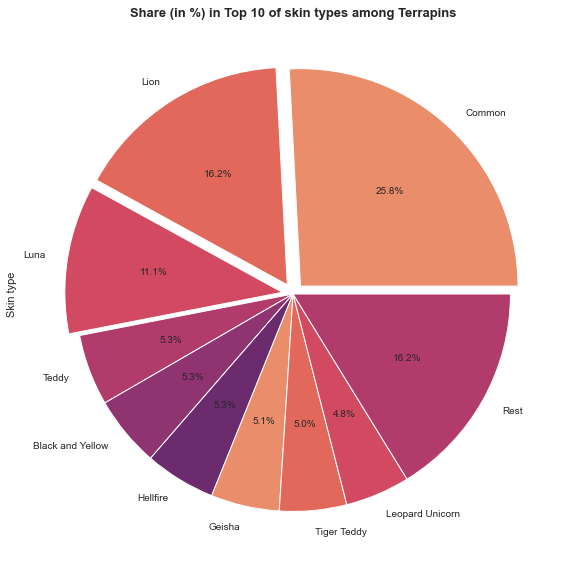

In [130]:
# Plot it on the pie plot
sns.set_style('whitegrid')
sns.set_palette('flare')
plt.figure(figsize = (10, 10))

explode = [0.05, 0.05, 0.05, 0, 0, 0, 0, 0, 0, 0]
plt.pie(top10_skin['Skin_type'], labels = top10_skin['Count'], autopct = '%1.1f%%', explode = explode)

#plt.xlabel('Count', fontsize = 11)
plt.ylabel('Skin type', fontsize = 11)
plt.title(r'Share (in %) in Top 10 of skin types among Terrapins', fontsize = 13, weight = 'bold')

plt.show()

From the sin we sleected the Top 10 values and used pie chart to see how the percenatges degrade among these set features. The ones which are less popular than Leopard Unicorn we summed up and classified as Rest. The most popular types of skin among Terrapins are Common (which as one and only reach 25\%), Lion and Luna. These three determine above 50\% of all skins.

<b>f) Shell</b>

In [131]:
import squarify

In [132]:
terra_df_shell = terra_df
terra_df_shell['shell'] = terra_df.shell.str.strip('Shell')

In [133]:
# Counting the most frequent hosts in the database
shell_type = terra_df_shell.shell.value_counts()

# Create new DataFrame with only the top 10 frequent hosts
top_shell = pd.DataFrame(shell_type)
top_shell.reset_index(inplace = True)
top_shell.rename(columns = {'index' : 'Shell_type', 'shell' : 'Count'}, inplace = True)
top_shell.head(10)

,Shell_type,Count
0,Base,4179
1,Spikes,844
2,Knight Sword - Blu,385
3,team Punk,384
4,Knight Sword - Green,369
5,Knight Sword - Brown,334
6,Dragon Scale - Green,306
7,Dragon Wings - Black,304
8,Angel Wings,274
9,Armoured,265


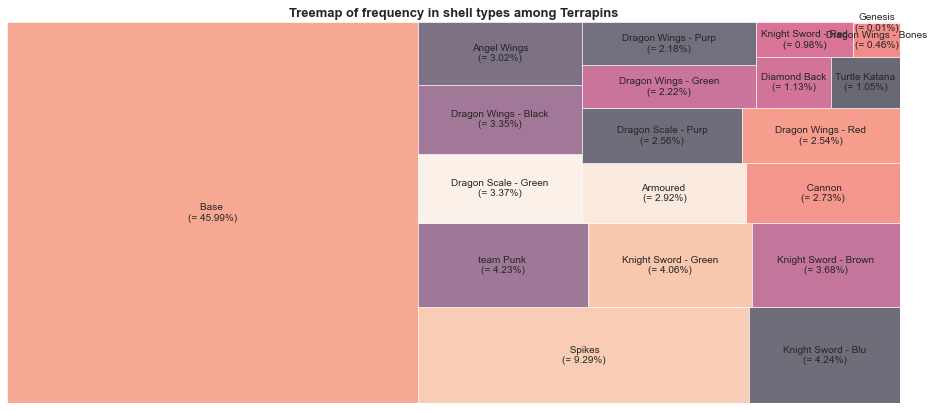

In [138]:
# Creating a tree map like in plotly
sns.set_style('whitegrid')
sns.set_palette('flare')
plt.figure(figsize = (16, 7))

perc = [round(i / top_shell['Count'].sum() * 100, 2) for i in top_shell['Count']]
labels = ['{0}\n(= {1}%)'.format(j[0], j[1]) for j in zip(top_shell['Shell_type'], perc)]

squarify.plot(sizes = top_shell['Count'], label = labels, alpha = 0.6)

plt.axis('off')
plt.title('Treemap of frequency in shell types among Terrapins', fontsize = 13, weight = 'bold')
plt.show()

Base type of shell has nearly 45\% of the market of Terrapins and is much, much larger then the second most popular one which is Spikes (only 9,18\%). Almost rest of the shells are between 5 and 2\%, when there are some features (upper right corner) where the share is even less.

<b>g) Background</b>

In [139]:
# Counting the most frequent hosts in the database
background_type = terra_df.background.value_counts()

# Create new DataFrame with only the top 10 frequent hosts
top_back = pd.DataFrame(background_type)
top_back.reset_index(inplace = True)
top_back.rename(columns = {'index' : 'Background_type', 'background' : 'Count'}, inplace = True)
top_back.head(10)

,Background_type,Count
0,Blue Grey,1383
1,Mint,1362
2,Purple,949
3,Steel Blue,887
4,Early Light,880
5,Baby Yellow,480
6,Charcoal Full Moon,468
7,Neon Pink,464
8,Lilac,463
9,Burnt Orange,440


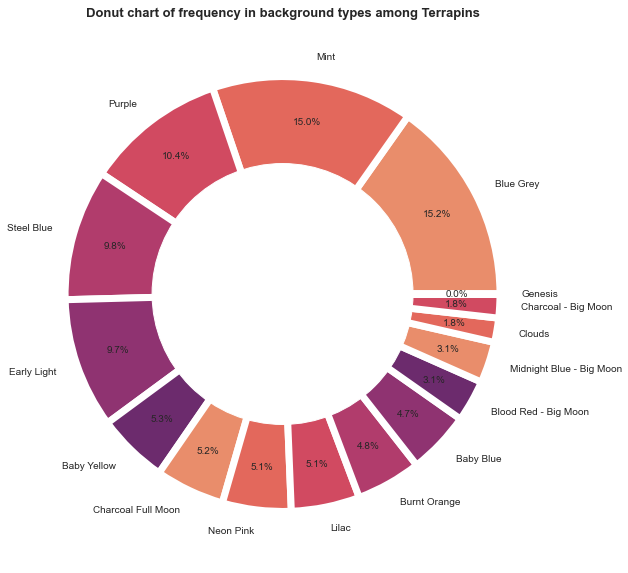

In [140]:
plt.figure(figsize = (10, 10))
my_circle = plt.Circle((0,0), 0.6, color = 'white')

# Custom wedges in donut chart
plt.pie(top_back['Count'], labels = top_back['Background_type'], autopct = '%1.1f%%',
        pctdistance = 0.8, wedgeprops = { 'linewidth' : 7, 'edgecolor' : 'white' })

p = plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Donut chart of frequency in background types among Terrapins', fontsize = 13, weight = 'bold')

plt.show()

Donut chart shows us exactly that the most frequent background for Terrapins on Terra are Blue Gray and Mint, both nearly 15\%. In the next places are also Purple (among previous two the only which reach 10\%), Steel Blue and Early Light. The we have a group of few features that are between 5,5\% and 3,1\% and also our outider - Genesis.

<h3>Data analysis - 2nd part</h3>

After checking the frequency of each feature among all attributes of apperance, we created a rarity score for each unique terrapin. We also made another plots for transactions vs your rarity score or rank (rank is given based on rarity) or weighted average of transactions depanding of all features.

In [141]:
terra_df.head()

,token_id,name,image,attributes,body,head,eyes,mouth,skin,shell,background
0,21115668659623778144848103954867683887,Terrapin #04880,ipfs://QmXarfYwaA3o83LTsXHJFKB5tyFJ8NRkfzsirMX...,"[['Mint', 'Background'], ['Geisha', 'Skin'], [...",Naked,Spiky Hair - Brown,Cyborg - Closed Eye,Snarl - Cigar,Geisha,Knight Sword - Brown,Mint
1,339686573371205809325137876315247034028,Terrapin #09271,ipfs://QmW8ACSfTzmMN69L4maLMiEQJAuXitziHc4senZ...,"[['Mint', 'Background'], ['Lion', 'Skin'], ['B...",Naked,Mohawk - Black,Tweeker Eyes,Snarl,Lion,Base,Mint
3,29725014212231427076011833295205785773,Terrapin #08213,ipfs://QmbgsWj3ZWE57spQkCUTpbp7L6EzrNyQ8zHSM7z...,"[['Lilac', 'Background'], ['Common', 'Skin'], ...",Leather Jacket - Black and White,Girls Hair - Brown,Eyepatch - Bored,Dopey,Common,Base,Lilac
4,208630217786676767860015082049195109707,Terrapin #03821,ipfs://QmZhQ1hcXWgoS7Gu3mDgdQhC5UNHnGnbBnCq5GT...,"[['Mint', 'Background'], ['Lion', 'Skin'], ['B...",Leather Jacket - Black and White,Pylon Helmet,Eyepatch - Angry,Grin - 5pm Shadow,Lion,Base,Mint
5,13063797792740649467356505712628160516,Terrapin #08804,ipfs://QmWekweavVb5k6tDm611pC62huBxybTMhPYUp2U...,"[['Blue Grey', 'Background'], ['Common', 'Skin...",Naked,Cheese Head,Sunnies - Gun Metal,Snarl,Common,Knight Sword - Green,Blue Grey


<b>Rarity ranking</b>

We created our own rarity ranking based on the attributes of the Terrapins. We assume thatevery feature is unique and has its own ranking of the rarity. If the single feature within single attribute is is the least frequent, its ranking is 1 in that category etc. So the most frequent features are the lasts in the single ranking. Then we multiplying all 7 attributes and combine unique rarity ranking for all Terrapins in the dataset.

<b>a) Body ranking</b>

In [162]:
body_ranking = pd.DataFrame(terra_df['body'].value_counts(ascending = True))
body_ranking.head(6)

,body
Genesis,1
Suit of Armour,8
Assassins Cloak - White,39
Luna Jersey 30,53
Assassins Cloak - Black,92
Kings Robe,92


In [159]:
body_ranking.index

Index(['Genesis', 'Suit of Armour', 'Assassins Cloak - White',
       'Luna Jersey 30', 'Assassins Cloak - Black', 'Kings Robe', 'Kimono',
       'Luna Shirt', 'Tuxedo', 'Suit and Tie', 'Steam Punk Shirt - Red',
       'Hawaiian Shirt - Pineapple', 'Cloak - Blue',
       'Leather Jacket - Black and White', 'Steam Punk Shirt - Blue',
       'Orange Shirt', 'Luna Jersey', 'Cloak - Brown', 'Cloak - Black',
       'Leather Jacket - Black', 'Hawaiian Shirt - Watermelon', 'Naked'],
      dtype='object')

In [160]:
body_ranking.loc['Leather Jacket - Black'][0]

651

In [163]:
def ranking_upgrade(df, column_name):
    ranking_place = 0
    values, counter = [], 0
    ranking = [0]
    
    for i in df.index:
        #print(df.loc[i][0], ranking[-1])
        if counter == 0:
            values.append(0)
        
        if df.loc[i][0] > values[-1]:
            ranking_place += 1
        
        ranking.append(ranking_place)
        values.append(df.loc[i][0])
        counter += 1
    
    ranking.remove(0)
    ranking_name = '{0}_ranking'.format(column_name)
    df[ranking_name] = ranking
    
    return df


In [166]:
body_rank = ranking_upgrade(body_ranking, 'body')
body_rank.head(6)

,body,body_ranking
Genesis,1,1
Suit of Armour,8,2
Assassins Cloak - White,39,3
Luna Jersey 30,53,4
Assassins Cloak - Black,92,5
Kings Robe,92,5


<b>b) Other features</b>

In [167]:
eyes_ranking = pd.DataFrame(terra_df['eyes'].value_counts(ascending = True))
head_ranking = pd.DataFrame(terra_df['head'].value_counts(ascending = True))
mouth_ranking = pd.DataFrame(terra_df['mouth'].value_counts(ascending = True))
skin_ranking = pd.DataFrame(terra_df['skin'].value_counts(ascending = True))
shell_ranking = pd.DataFrame(terra_df['shell'].value_counts(ascending = True))
background_ranking = pd.DataFrame(terra_df['background'].value_counts(ascending = True))

shell_ranking.head()

,shell
Genesis,1
Dragon Wings - Bones,42
Knight Sword - Red,89
Turtle Katana,95
Diamond Back,103


In [168]:
list_of_rankings = [eyes_ranking, head_ranking, mouth_ranking,
                  skin_ranking, shell_ranking, background_ranking]
columns_names = ['eyes', 'head', 'mouth', 'skin', 'shell', 'background']

assert len(list_of_rankings) != list(columns_names)

for i in range(len(list_of_rankings)):
    list_of_rankings[i] = ranking_upgrade(list_of_rankings[i], columns_names[i])
    
eyes_ranking.head(7), background_ranking.head(7)

(                             eyes  eyes_ranking
 Genesis                         1             1
 Goggle Steam Punk - Laser      33             2
 Cyborg - Laser                 34             3
 Steam Punk - Angry Clown       36             4
 Terrorpin                      49             5
 Bandana - Blue                 84             6
 Spectacles - Tortoise Shell    84             6,
                           background  background_ranking
 Genesis                            1                   1
 Charcoal - Big Moon              160                   2
 Clouds                           164                   3
 Midnight Blue - Big Moon         278                   4
 Blood Red - Big Moon             283                   5
 Baby Blue                        424                   6
 Burnt Orange                     440                   7)

In [181]:
2 in terra_df.index

False

In [237]:
def terrapin_csv_rarity_ranking(terra_csv):
    rankings = np.zeros(len(terra_csv.index))
    j = 0
    
    for i in tqdm(range(max(terra_csv.index)), desc = 'Progress'):
        if i in terra_csv.index:
            # Create individual list with feature ratings
            features = np.zeros(7)

            body, eyes = terra_df['body'][i], terra_df['eyes'][i]
            head, mouth = terra_df['head'][i], terra_df['mouth'][i]
            skin, shell = terra_df['skin'][i], terra_df['shell'][i]
            background = terra_df['background'][i]

            features[0] = body_ranking['body_ranking'][body_ranking.index == body].iloc[0]
            features[1] = eyes_ranking['eyes_ranking'][eyes_ranking.index == eyes].iloc[0]

            features[2] = head_ranking['head_ranking'][head_ranking.index == head].iloc[0]
            features[3] = mouth_ranking['mouth_ranking'][mouth_ranking.index == mouth].iloc[0]

            features[4] = skin_ranking['skin_ranking'][skin_ranking.index == skin].iloc[0]
            features[5] = shell_ranking['shell_ranking'][shell_ranking.index == shell].iloc[0]

            features[6] = background_ranking['background_ranking'][background_ranking.index == background].iloc[0]

            rankings[j] = np.prod(features)
            j += 1
    
    # Scaling rarity score to range(0, 1) and reshape (so 1 is the most unique)
    #rankings = 1 - ((rankings - min(rankings)) / (max(rankings) - min(rankings)))
    terra_csv['Rarity_score'] = rankings
    terra_csv = terra_csv[terra_csv['Rarity_score'] != 0.0]
    
    # Scaling rarity score to range(0, 1) and reshape (so 1 is the most unique)
    maxi, mini = max(terra_csv['Rarity_score']), min(terra_csv['Rarity_score'])
    terra_csv['Rarity_score'] = 1 - ((terra_csv['Rarity_score'] - mini) / (maxi - mini))
    
    return terra_csv


In [238]:
terra_rarity = terrapin_csv_rarity_ranking(terra_df)

Progress: 100%|██████████| 9999/9999 [00:05<00:00, 1750.87it/s]
C:\Users\Kuba\AppData\Local\Temp\ipykernel_3748\1746103437.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  terra_csv['Rarity_score'] = 1 - ((terra_csv['Rarity_score'] - mini) / (maxi - mini))


In [239]:
terra_rarity.shape

(9085, 12)

In [241]:
terra_rarity.sort_values(by = 'Rarity_score', ascending = True).tail(5)

,token_id,name,image,attributes,body,head,eyes,mouth,skin,shell,background,Rarity_score
9895,149992597372124276704433084675740439337,Terrapin #00046,ipfs://QmQmybpGGxqTaQKMCnzzYmUQ3VXc66uWFs2WU8r...,"[['Mint', 'Background'], ['Leopard Lion', 'Ski...",Suit and Tie,Astronaut Helmet - Black,Bored Eyes,Scream,Leopard Lion,Turtle Katana,Mint,0.999520
4043,5267154879320350042752930380503850512,Terrapin #07619,ipfs://QmTjC92y3ZjzNCUkLjAqWcus97Wn3YRYdC8h4Rm...,"[['Charcoal - Big Moon', 'Background'], ['Unic...",Suit and Tie,Assassins Cowl - Black,Steam Punk - Tweeker,Snarl,Unicorn,Knight Sword - Red,Charcoal - Big Moon,0.999541
578,181914607006616528701355262172298268097,Terrapin #09808,ipfs://QmT3jMEpP6ccuue1vkFB9hyo6YMfKaQ1yn9gBLa...,"[['Baby Blue', 'Background'], ['Zombie', 'Skin...",Luna Jersey 30,Mohawk - Rainbow,Cyborg - Angry,Scream,Zombie,Dragon Scale - Purp,Baby Blue,0.999558
3276,30376386178349782563022273087225318233,Terrapin #02487,ipfs://QmamrhHy1Ah6KRVDBHDWY1isQeSezoe9trKTAPc...,"[['Charcoal - Big Moon', 'Background'], ['Mono...",Naked,Top Hat - Steam Punk,Goggle Steam Punk - Black,Licky Licky,Monochrome,Dragon Wings - Green,Charcoal - Big Moon,0.999634
2632,1100976233440435207382023335471950562,Terrapin #06155,ipfs://QmedvwJn5s4EjnEEgyjqtvtgr6Y1HwWYNjq2EWv...,"[['Genesis', 'Background'], ['Genesis', 'Skin'...",Genesis,Genesis,Genesis,Genesis,Genesis,Genesis,Genesis,1.000000


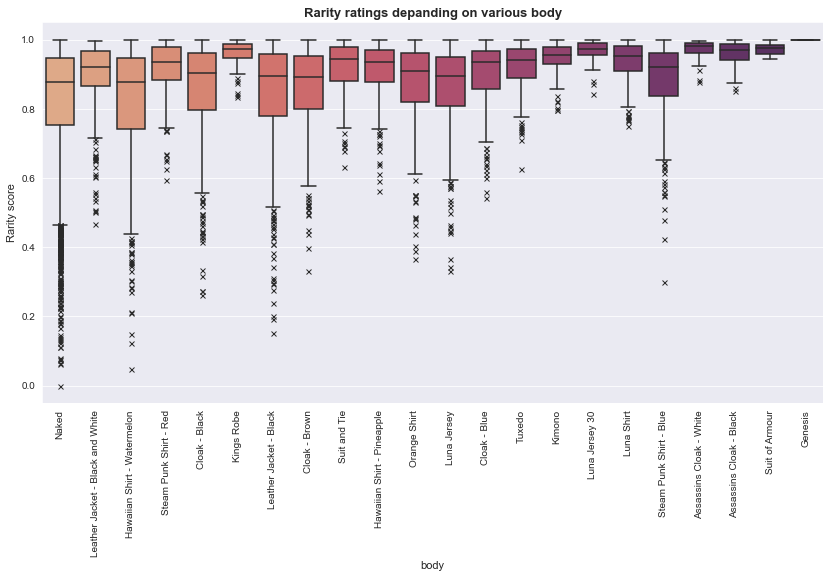

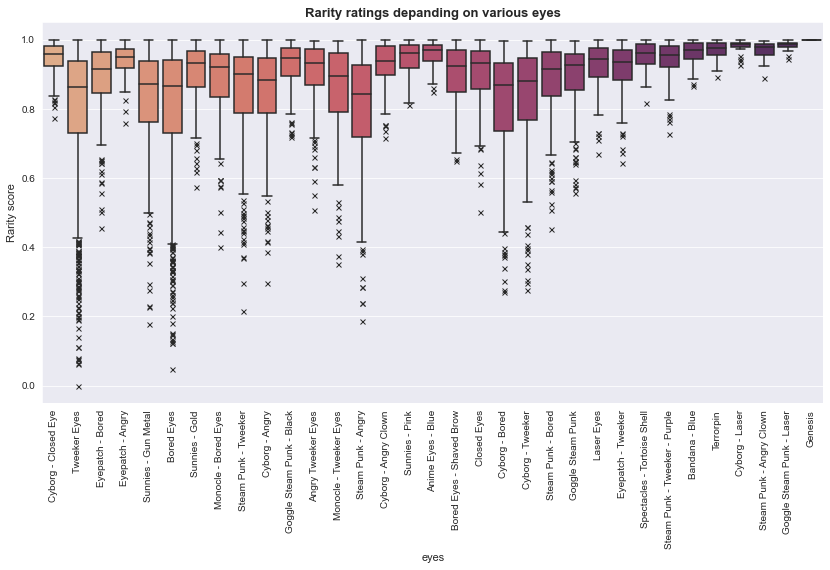

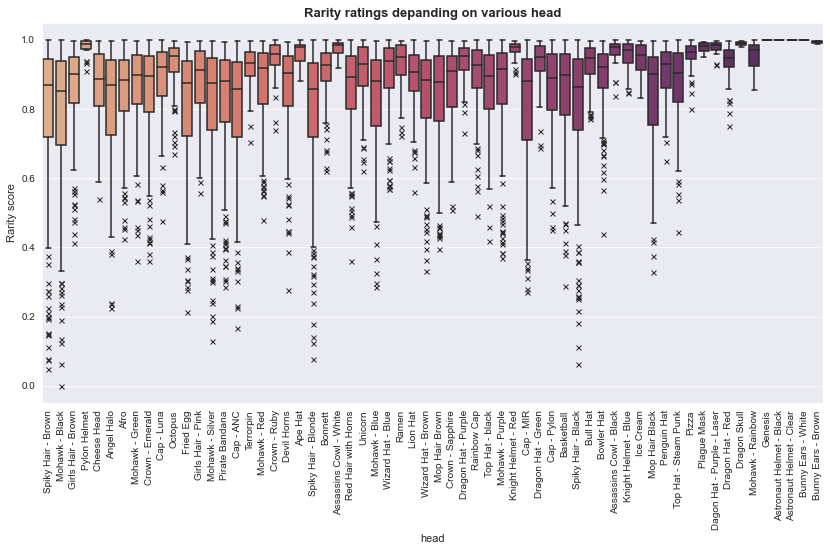

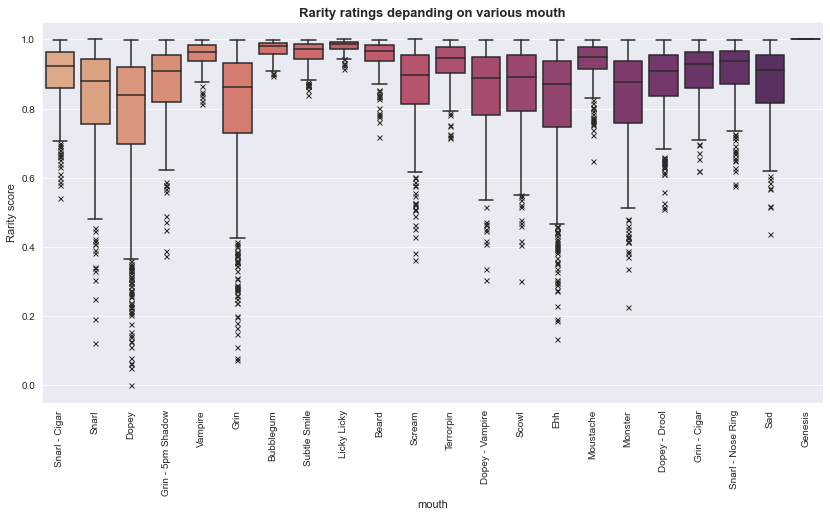

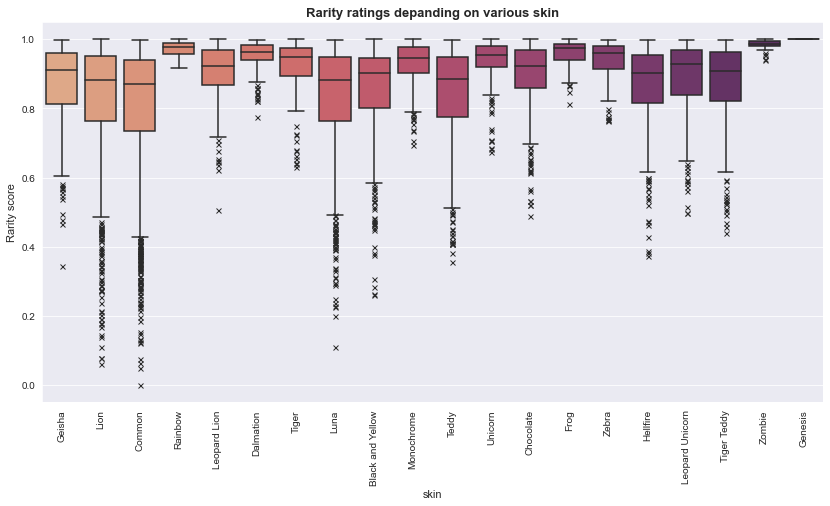

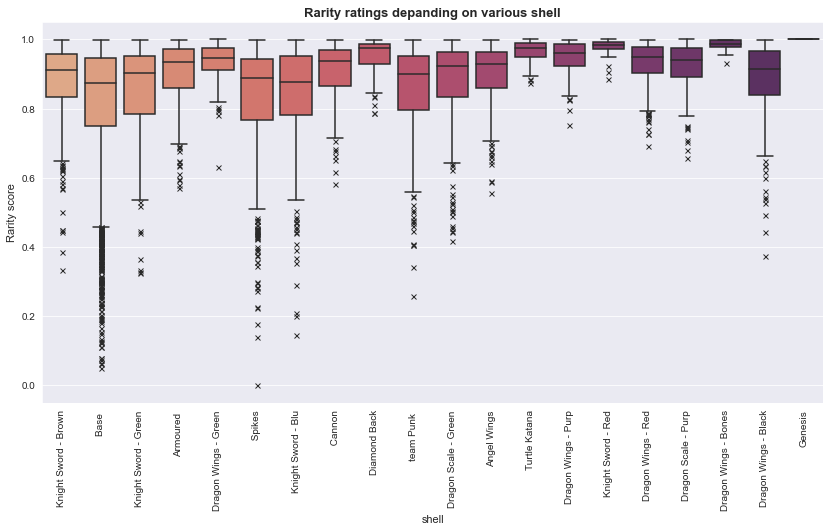

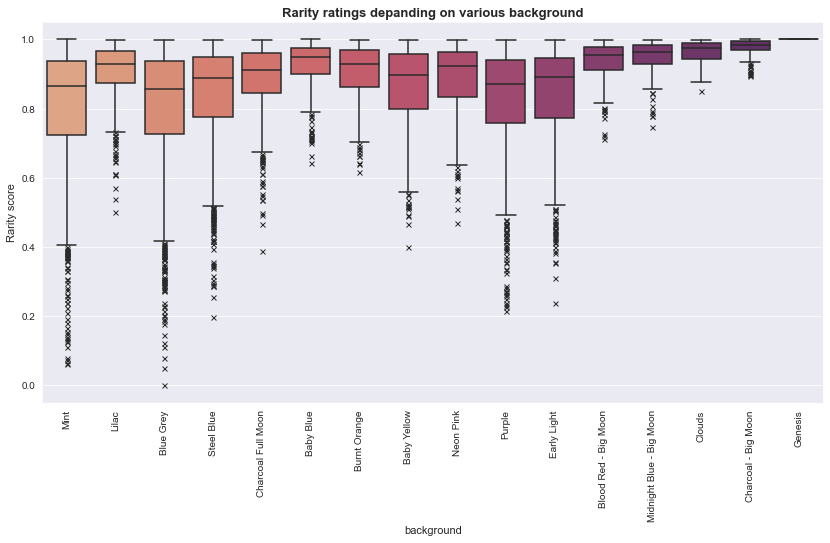

In [243]:
# Rarity scores for different attributes

features = ['body', 'eyes', 'head', 'mouth', 'skin', 'shell', 'background']

for i in features:
    plt.figure(figsize = (14, 7))
    sns.set_style('darkgrid')

    sns.boxplot(data = terra_rarity, y = 'Rarity_score', x = i, palette = 'flare', 
                flierprops = {'marker': 'x'})

    plt.xlabel(i, fontsize = 11)
    plt.xticks(rotation = 90)
    plt.ylabel('Rarity score', fontsize = 11)
    plt.title(r'Rarity ratings depanding on various {0}'.format(i), fontsize = 13, weight = 'bold')

    plt.show()
    

Genesis is the least frequent feature in any attribute what makes it a special, because there is only one case in every category with this feature. The rarity score for this one row is 1, so this is the most uniqueness row in whole csv. file. For others in every feature there are some hesitations - the average values are so diferent for the cases in each category, for some the distribution are widther, some are tighter. In some cases there are a lot of outsiders - for example for 'Mint' and 'Blue Grey' in Backgorund or 'Base' in Shell.

It is clear to see that, if the box of the distribution is smaller, there is nearly the value of 1 and the bottom boundary is above the level of 0.8. Almost every speciality has minimum a few cases in which their rarity score is very close to one, so we can observe that upper boundary is nearly equal  to 1.

<b>The rarest and the most frequent ones</b>

In [244]:
# All Terrapins whose rarity score is equal to 1 (the rarest ones)

unique = terra_rarity[terra_rarity['Rarity_score'] == 1]
print('The rarest attributes combination:' +
      
      '\n-> body : {0}, eyes : {1}, head : {2}, mouth : {3},' 
      .format(unique['body'].values[0], unique['eyes'].values[0], unique['head'].values[0],
             unique['mouth'].values[0]) +
      
      '\n   shell : {0}, skin : {1}, background : {2}'
      .format(unique['shell'].values[0], unique['skin'].values[0], unique['background'].values[0]))


The rarest attributes combination:
-> body : Genesis, eyes : Genesis, head : Genesis, mouth : Genesis,
   shell : Genesis, skin : Genesis, background : Genesis


In [245]:
# All Terrapins whose rarity score is equal to 1 (the rarest ones)

unique = terra_rarity[terra_rarity['Rarity_score'] == 0]
print('The most frequent attributes combination:' +
      
      '\n-> body : {0}, eyes : {1}, head : {2}, mouth : {3},' 
      .format(unique['body'].values[0], unique['eyes'].values[0], unique['head'].values[0],
             unique['mouth'].values[0]) +
      
      '\n   shell : {0}, skin : {1}, background : {2}'
      .format(unique['shell'].values[0], unique['skin'].values[0], unique['background'].values[0]))

The most frequent attributes combination:
-> body : Naked, eyes : Tweeker Eyes, head : Mohawk - Black, mouth : Dopey,
   shell :  Spikes, skin : Common, background : Blue Grey


<b>Joining two tables on 'token id'</b>

In [246]:
terra_business = pd.read_csv('Terrapin_transactions.csv', index_col = 0)
terra_business.rename(columns = {'token':'token_id'}, inplace = True)
terra_business.head()

,token_id,transaction,timestamp
0,37652866804103441027315721591982379783,3.00,2022-11-18T15:31:45Z
1,5940053496978200634113946322602071220,4.00,2022-11-18T15:31:45Z
2,220436945093649783100222149121448731424,1.29,2022-11-18T15:31:45Z
3,25277470195757809775751636322699447488,1.00,2022-11-18T15:31:45Z
4,184286935479822961884207585910026500370,2.00,2022-11-18T15:31:45Z


In [247]:
terra_all = terra_rarity.merge(terra_business, how = 'inner', on = 'token_id')
terra_all.head()

,token_id,name,image,attributes,body,head,eyes,mouth,skin,shell,background,Rarity_score,transaction,timestamp
0,216558890329471238046781745626123499152,Terrapin #04835,ipfs://QmSjtJtBErBDsiie8LnWdbaHViXiSnjDJogTLHi...,"[['Burnt Orange', 'Background'], ['Luna', 'Ski...",Naked,Octopus,Steam Punk - Tweeker,Dopey,Luna,Base,Burnt Orange,0.875806,2.75,2022-11-18T15:31:45Z
1,216558890329471238046781745626123499152,Terrapin #04835,ipfs://QmSjtJtBErBDsiie8LnWdbaHViXiSnjDJogTLHi...,"[['Burnt Orange', 'Background'], ['Luna', 'Ski...",Naked,Octopus,Steam Punk - Tweeker,Dopey,Luna,Base,Burnt Orange,0.875806,4.50,2022-11-18T15:31:45Z
2,226985267881686443594614642682392963609,Terrapin #08116,ipfs://QmdUKhpvBWLEkKe7TNdbo7rQ7P3h66aYDGd5bqc...,"[['Charcoal Full Moon', 'Background'], ['Dalma...",Orange Shirt,Mohawk - Silver,Bored Eyes,Dopey,Dalmation,Dragon Scale - Green,Charcoal Full Moon,0.927444,5.00,2022-11-18T15:31:45Z
3,205243114526793481085240592636593551494,Terrapin #06044,ipfs://QmeCHEmDD7q7C7uuLE5EJeaVsGpzkeB1SE3p5Fy...,"[['Mint', 'Background'], ['Luna', 'Skin'], ['S...",Cloak - Brown,Bonnett,Tweeker Eyes,Dopey - Vampire,Luna,Cannon,Mint,0.889842,4.50,2022-11-18T15:31:45Z
4,257770636582405925992774140952139293526,Terrapin #05070,ipfs://QmWCZdy8WHjYcwG88vdz6uD9ACyTBEszK5r2tko...,"[['Lilac', 'Background'], ['Lion', 'Skin'], ['...",Naked,Octopus,Tweeker Eyes,Dopey,Lion,Base,Lilac,0.818966,3.20,2022-11-18T15:31:45Z


In [248]:
terra_all.shape
terra_all.columns

Index(['token_id', 'name', 'image', 'attributes', 'body', 'head', 'eyes',
       'mouth', 'skin', 'shell', 'background', 'Rarity_score', 'transaction',
       'timestamp'],
      dtype='object')

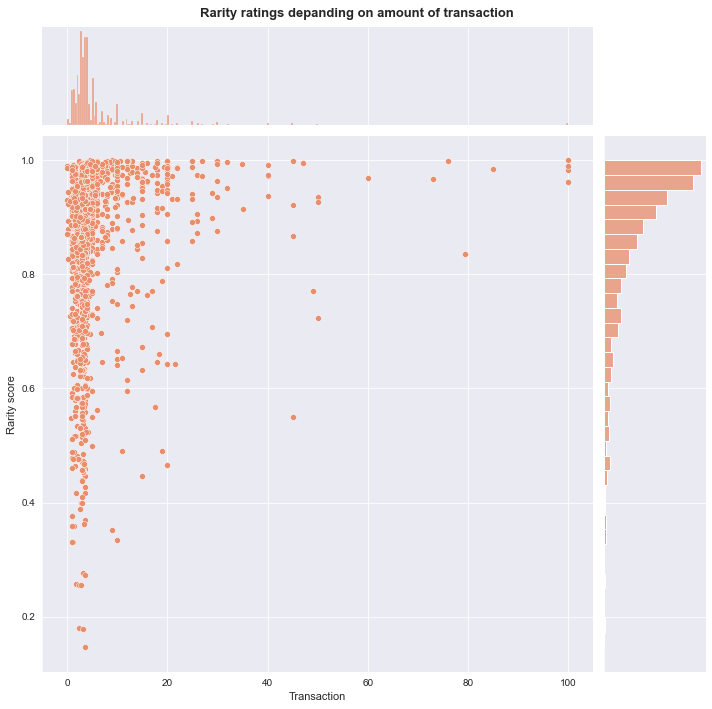

In [249]:
sns.set_style('darkgrid')

fig = sns.jointplot(data = terra_all, y = 'Rarity_score', x = 'transaction', 
              palette = 'flare', kind = 'scatter', height = 10)

fig.set_axis_labels('Transaction', 'Rarity score', fontsize = 11)
fig.figure.suptitle('Rarity ratings depanding on amount of transaction', fontsize = 13, weight = 'bold')
fig.figure.tight_layout()
plt.show()

From the graph above, we can observe that there is not a strong correlation between rarity score and the amount of transaction. Most of the dots are located in the upper left corner where there are the largest values of rarity score and smallest of the transcation. But we come up to one conclusion - if we consider the largest transaction, we can assume that it will have a high rarity rating. Every dot for transaction above 40 has a rarity above 0,5.

<b>Amount o transactions for every type of attributes</b>

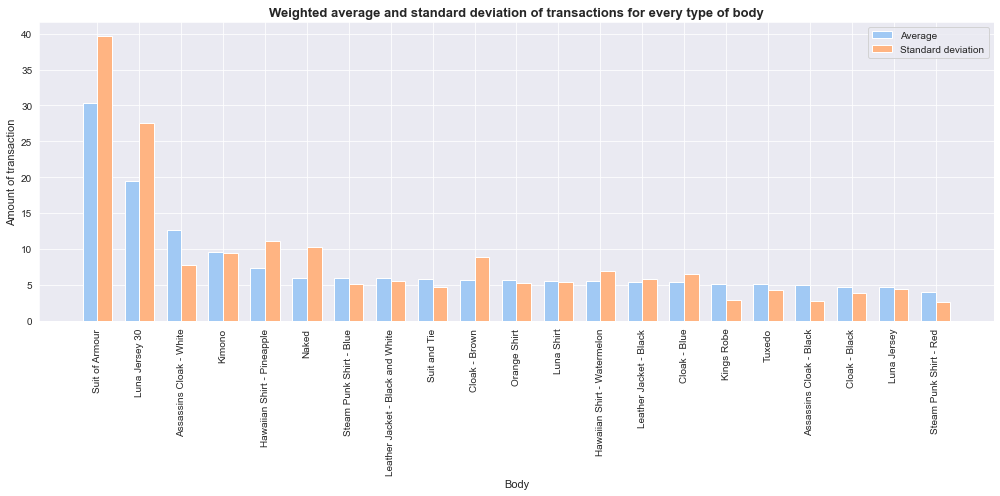

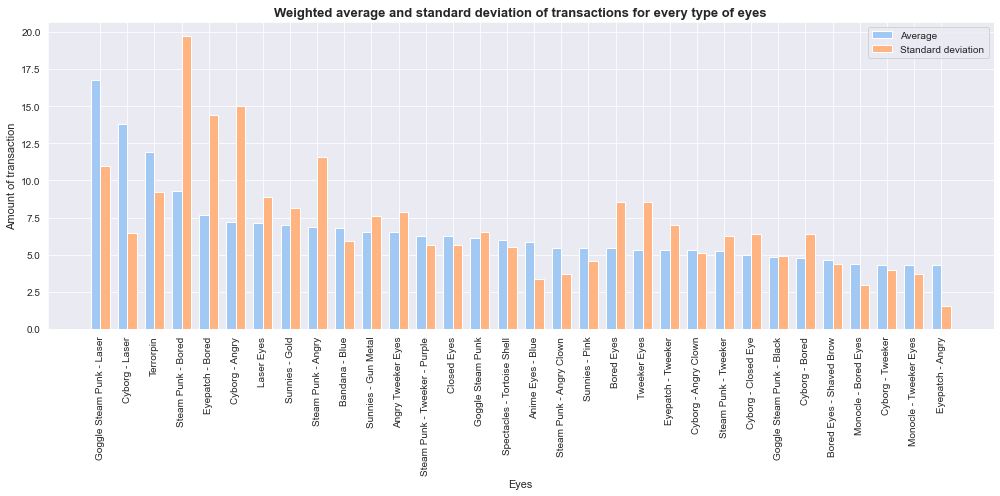

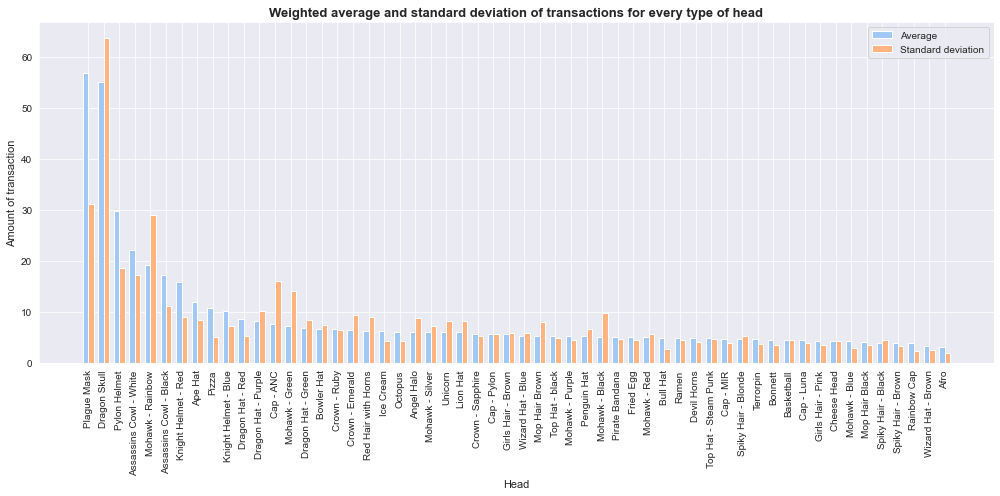

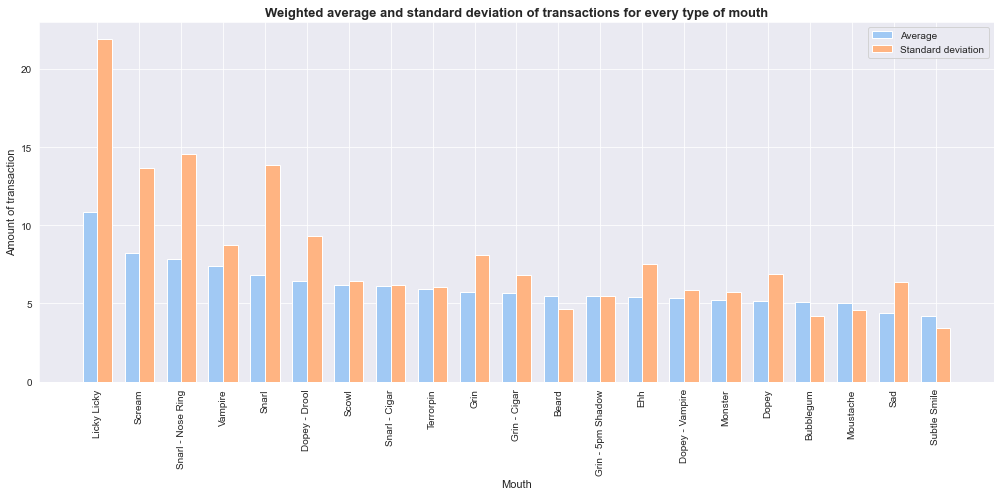

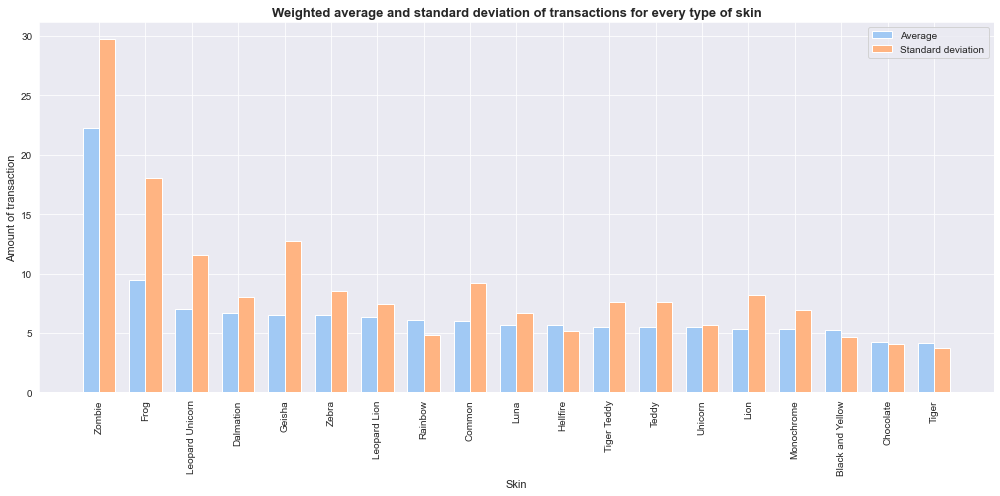

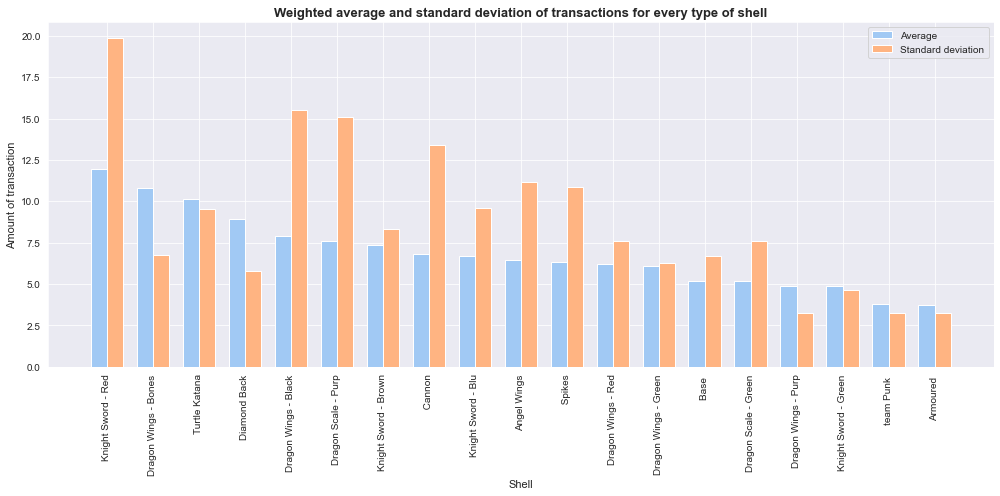

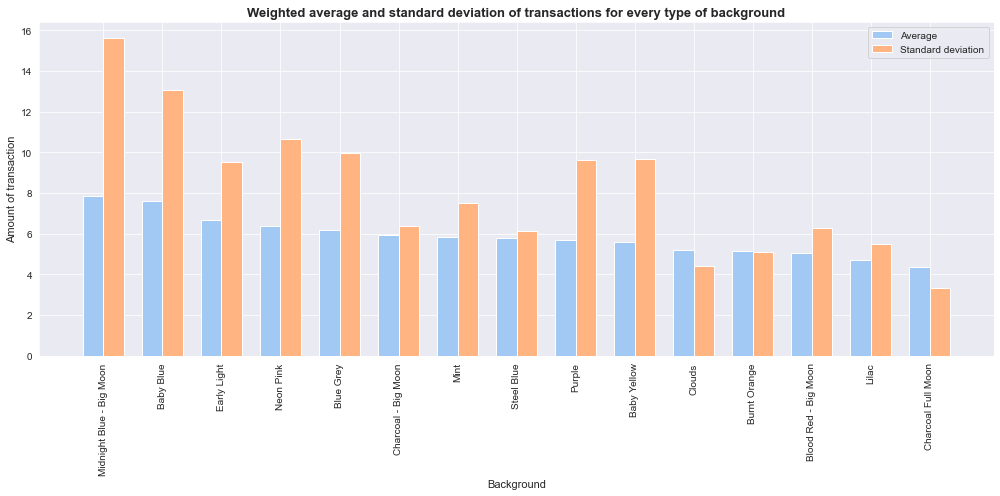

In [261]:
# Rarity scores for different attributes

features = ['body', 'eyes', 'head', 'mouth', 'skin', 'shell', 'background']
x_labels = ['Body', 'Eyes', 'Head', 'Mouth', 'Skin', 'Shell', 'Background'] 
counter = 0
sns.set_palette('pastel')

for i in features:
    means_df = terra_all.groupby(i)['transaction'].mean().sort_values(ascending=False)
    stds_df = terra_all.groupby(i)['transaction'].std().sort_values(ascending=False)
    stds_df = stds_df.reindex(means_df.index)

    labels = means_df.index
    x = np.arange(len(labels))
    width = 0.35

    fig, ax = plt.subplots(figsize = (14, 7))

    bar_mean = ax.bar(x - width/2, means_df, width, label = 'Average')
    bar_std = ax.bar(x + width/2, stds_df, width, label = 'Standard deviation')

    ax.set_xlabel(x_labels[counter], fontsize = 11)
    counter += 1
    ax.set_ylabel('Amount of transaction', fontsize = 11)
    ax.set_title('Weighted average and standard deviation of transactions for every type of {0}'.format(i), fontsize = 13, weight = 'bold')
    ax.set_xticks(x, labels, rotation = 90)
    ax.legend()

    fig.tight_layout()

    plt.show()
    

In every category we cleary see that for many features there are similar amount of transactions started on third largest bar, but there are some differences in standard devation. So predicting transactions based on attributes could be really difficult, becuase it is not a rarely situation when std is larger then mean! For example in shells these situation repeat 11 times on 19 cases.

It is worth to mention that in head types there are two leaders in average of transactions - Plague Mask and Dragon Skull are above the level of 50 when the third - Pylon Helmet is only nearly 30. There are also the highest values in terms of all features in all attributes. In the rest maximum is between 10 and 30. Also in other attributes the amount of transaction is decreasing more smoothly.

<h3>Summury</h3>

For this project we conducted data downloading of Terra NFTs data with analysis of the 10 000 unique, randomly generated NFTs with indiviudal characteristics such as background, mouth, shell or head etc. We check which attributes of the terrapins are the most popular ones across all users of this cryptocurrency and also calculating some trends and statistics for the transactions of them. It was not an easy process, because of the fact that many of the features are very nested in a lot of dictionaries, so we spend much time to uncover information to make the process of data analysis available.

Finally we made it clearly with lots of effort and showed the features on the various types of graphs - some types of eyes or heads are very popular across the users (for example tweeker eyes or mohawk black head). We also created our own rarity ranking to find the most unpopular apperances of the terrapins and cheked how the transactions are correlated to the indivual combinations of features. 